# APPLE APP STORE - Transforming Raw to Clean Data
_______________________

* Consideration: source data was scraped from the web

## Objectives:

* Create a cleaned up version of the Apple Store Source Data by filtering:

 - Games with no reviews
 - Duplicates
 - Converting all ratings, reviews, installs, and price to uniform types and formats by column
 

* Subsequently, make sure there's no duplicate app names or double counting / aggegration; organize by apps, and remove exact duplicates, and or take the higher of the two


* Final Product consist of a Clean CSV File, Pie Chart and Bar Graph,

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Displaying manually clean dataset
#read = "./resources/final_clean/Final_Apple.csv"
read = "./resources/original_raw_data/appleappstore.csv"
apple_df = pd.read_csv(read)
apple_df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [3]:
# Preview columns and count of each
apple_df.count()

Unnamed: 0          7197
id                  7197
track_name          7197
size_bytes          7197
currency            7197
price               7197
rating_count_tot    7197
rating_count_ver    7197
user_rating         7197
user_rating_ver     7197
ver                 7197
cont_rating         7197
prime_genre         7197
sup_devices.num     7197
ipadSc_urls.num     7197
lang.num            7197
vpp_lic             7197
dtype: int64

In [4]:
# Drop unnecessary columns
cols = [0, 1, 3, 7, 9, -7, -6, -4, -3, -2, -1]
apple_df.drop(apple_df.columns[cols], axis=1, inplace=True)
apple_df.head()

,track_name,currency,price,rating_count_tot,user_rating,prime_genre
0,PAC-MAN Premium,USD,3.99,21292,4.0,Games
1,Evernote - stay organized,USD,0.00,161065,4.0,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",USD,0.00,188583,3.5,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",USD,0.00,262241,4.0,Shopping
4,Bible,USD,0.00,985920,4.5,Reference


In [5]:
# Rename Columns
apple_df.rename(columns={'track_name': 'App', 'currency':'Currency', 'price':'Price', 'rating_count_tot': 'Reviews',
                         'user_rating': 'Ratings', 'prime_genre': 'Category'}, inplace=True)
apple_df.head()

,App,Currency,Price,Reviews,Ratings,Category
0,PAC-MAN Premium,USD,3.99,21292,4.0,Games
1,Evernote - stay organized,USD,0.00,161065,4.0,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",USD,0.00,188583,3.5,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",USD,0.00,262241,4.0,Shopping
4,Bible,USD,0.00,985920,4.5,Reference


In [6]:
# Rearrange columns to match Google Play Store Set Up
apple_df = apple_df[['App','Category','Ratings','Reviews', 'Price', 'Currency']]
apple_df.head()

,App,Category,Ratings,Reviews,Price,Currency
0,PAC-MAN Premium,Games,4.0,21292,3.99,USD
1,Evernote - stay organized,Productivity,4.0,161065,0.00,USD
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",Weather,3.5,188583,0.00,USD
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",Shopping,4.0,262241,0.00,USD
4,Bible,Reference,4.5,985920,0.00,USD


In [7]:
apple_df['Category'].value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: Category, dtype: int64

In [8]:
# Sort Values by Reviews
apple_df = apple_df.sort_values(by= ['Reviews'], ascending=False)
apple_df.head(10)

,App,Category,Ratings,Reviews,Price,Currency
16,Facebook,Social Networking,3.5,2974676,0.0,USD
519,Instagram,Photo & Video,4.5,2161558,0.0,USD
1346,Clash of Clans,Games,4.5,2130805,0.0,USD
707,Temple Run,Games,4.5,1724546,0.0,USD
7,Pandora - Music & Radio,Music,4.0,1126879,0.0,USD
755,Pinterest,Social Networking,4.5,1061624,0.0,USD
4,Bible,Reference,4.5,985920,0.0,USD
1493,Candy Crush Saga,Games,4.5,961794,0.0,USD
178,Spotify Music,Music,4.5,878563,0.0,USD
275,Angry Birds,Games,4.5,824451,0.0,USD


In [9]:
#Elimanting values in our dataset (lower 75%) in order to get a smaller sample size
top_quartile = np.percentile(apple_df['Reviews'], 75)
top_quartile

2793.0

In [10]:
#Creating a new dataframe which shows the top 25%
top_quartile_data_df = apple_df.loc[apple_df['Reviews'] > top_quartile]
top_quartile_data_df

,App,Category,Ratings,Reviews,Price,Currency
16,Facebook,Social Networking,3.5,2974676,0.00,USD
519,Instagram,Photo & Video,4.5,2161558,0.00,USD
1346,Clash of Clans,Games,4.5,2130805,0.00,USD
707,Temple Run,Games,4.5,1724546,0.00,USD
7,Pandora - Music & Radio,Music,4.0,1126879,0.00,USD
755,Pinterest,Social Networking,4.5,1061624,0.00,USD
4,Bible,Reference,4.5,985920,0.00,USD
1493,Candy Crush Saga,Games,4.5,961794,0.00,USD
178,Spotify Music,Music,4.5,878563,0.00,USD
275,Angry Birds,Games,4.5,824451,0.00,USD


In [11]:
#Combining certain Categories in order to clean up the data even more and reducing the number of category for our pie and bar charts

top_quartile_data_df['Category'] = [x.replace("Book","Education") for x in top_quartile_data_df['Category']]
top_quartile_data_df['Category'] = [x.replace("News","Education") for x in top_quartile_data_df['Category']]
top_quartile_data_df['Category'] = [x.replace("Catalogs","Education") for x in top_quartile_data_df['Category']]

top_quartile_data_df['Category'] = [x.replace("Food & Drink","Lifestyle") for x in top_quartile_data_df['Category']]
top_quartile_data_df['Category'] = [x.replace("Music","Lifestyle") for x in top_quartile_data_df['Category']]
top_quartile_data_df['Category'] = [x.replace("Shopping","Lifestyle") for x in top_quartile_data_df['Category']]
top_quartile_data_df['Category'] = [x.replace("Health & Fitness","Lifestyle") for x in top_quartile_data_df['Category']]
top_quartile_data_df['Category'] = [x.replace("Entertainment","Lifestyle") for x in top_quartile_data_df['Category']]
top_quartile_data_df['Category'] = [x.replace("Medical","Lifestyle") for x in top_quartile_data_df['Category']]

top_quartile_data_df['Category'] = [x.replace("Social Networking","Social") for x in top_quartile_data_df['Category']]

top_quartile_data_df['Category'] = [x.replace("Weather","Travel") for x in top_quartile_data_df['Category']]
top_quartile_data_df['Category'] = [x.replace("Navigation","Travel") for x in top_quartile_data_df['Category']]

top_quartile_data_df['Category'] = [x.replace("Reference","Utility") for x in top_quartile_data_df['Category']]
top_quartile_data_df['Category'] = [x.replace("Photo & Video","Utility") for x in top_quartile_data_df['Category']]
top_quartile_data_df['Category'] = [x.replace("Utilities","Utility") for x in top_quartile_data_df['Category']]
top_quartile_data_df['Category'] = [x.replace("Finance","Business") for x in top_quartile_data_df['Category']]

C:\Users\JOHNE\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\JOHNE\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\JOHNE\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [12]:
# Extract unique categories and respective total counts, and sort by index (Category Name) in Ascending Order
category_sizes = top_quartile_data_df['Category'].value_counts()
category_sizes = list(category_sizes.sort_index(ascending=True))
print(category_sizes)

[38, 78, 1009, 307, 61, 58, 32, 41, 174]


In [13]:
# Extract all unique category names only, and put in ascending order
categories = top_quartile_data_df['Category'].unique()
categories_list = list(categories)
categories.sort()
print(categories)

['Business' 'Education' 'Games' 'Lifestyle' 'Productivity' 'Social'
 'Sports' 'Travel' 'Utility']


<IPython.core.display.Javascript object>


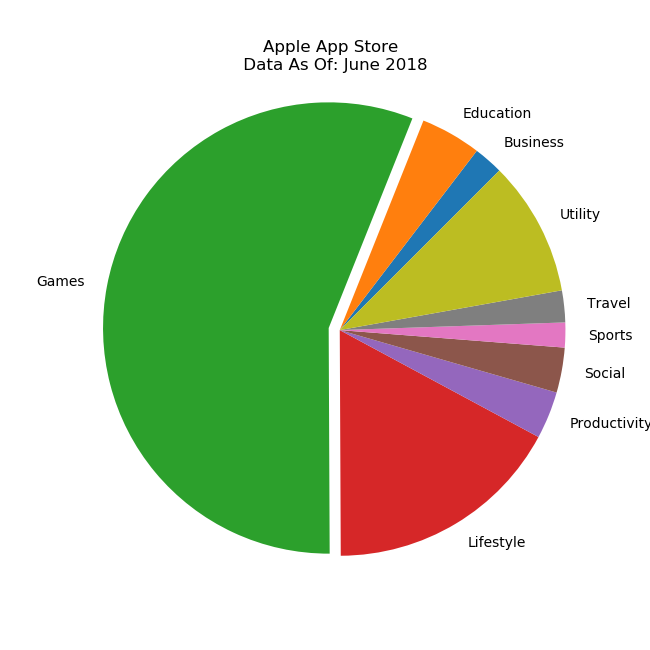

In [14]:
# Creating the Pie Chart
plt.figure(1, figsize=(6.5,6.5))
#members = [16, 21, 377, 98, 15, 32, 15, 24, 43]
#categories = ["Business","Education","Games","Lifestyle","Productivity","Social Networking","Sports","Travel","Utlity"]
explode = (0, 0, 0.05, 0, 0, 0, 0, 0, 0)
plt.pie(category_sizes, labels=categories, explode=explode, shadow=False, startangle=45)
plt.title("Apple App Store \n Data As Of: June 2018")
plt.axis("equal")

#Saving the pie chart
plt.savefig("./images/Apple_Pie_Chart.png", bbox_inches='tight')

In [ ]:
#Exporting the final clean data to it's own CSV file
top_quartile_data_df.to_csv('./resources/final_clean/final_apple_data.csv', encoding='utf-8')

In [15]:
# Read in final clean data and drop the unnecessary first column that results from reading in a csvfile
top_quartile_data_df = pd.read_csv("./resources/final_clean/final_apple_data.csv", encoding='utf-8')
top_quartile_data_df.drop(top_quartile_data_df.columns[0], axis=1, inplace=True)

In [16]:
top_quartile_data_df.head(10)

,App,Category,Ratings,Reviews,Price,Currency
0,Facebook,Social,3.5,2974676,0.0,USD
1,Instagram,Utility,4.5,2161558,0.0,USD
2,Clash of Clans,Games,4.5,2130805,0.0,USD
3,Temple Run,Games,4.5,1724546,0.0,USD
4,Pandora - Music & Radio,Lifestyle,4.0,1126879,0.0,USD
5,Pinterest,Social,4.5,1061624,0.0,USD
6,Bible,Utility,4.5,985920,0.0,USD
7,Candy Crush Saga,Games,4.5,961794,0.0,USD
8,Spotify Music,Lifestyle,4.5,878563,0.0,USD
9,Angry Birds,Games,4.5,824451,0.0,USD


In [17]:
facebook_rating = top_quartile_data_df.loc[top_quartile_data_df['App'] == 'Facebook']
facebook_rating

,App,Category,Ratings,Reviews,Price,Currency
0,Facebook,Social,3.5,2974676,0.0,USD


In [18]:
instagram_rating = top_quartile_data_df.loc[top_quartile_data_df['App'] == 'Instagram']
instagram_rating

,App,Category,Ratings,Reviews,Price,Currency
1,Instagram,Utility,4.5,2161558,0.0,USD


In [19]:
coc_rating = top_quartile_data_df.loc[top_quartile_data_df['App'] == 'Clash of Clans']
coc_rating

,App,Category,Ratings,Reviews,Price,Currency
2,Clash of Clans,Games,4.5,2130805,0.0,USD


In [20]:
templerun_rating = top_quartile_data_df.loc[top_quartile_data_df['App'] == 'Temple Run']
templerun_rating

,App,Category,Ratings,Reviews,Price,Currency
3,Temple Run,Games,4.5,1724546,0.0,USD


In [21]:
pandora_rating = top_quartile_data_df.loc[top_quartile_data_df['App'] == 'Pandora - Music & Radio']
pandora_rating

,App,Category,Ratings,Reviews,Price,Currency
4,Pandora - Music & Radio,Lifestyle,4.0,1126879,0.0,USD


In [22]:
pinterest_rating = top_quartile_data_df.loc[top_quartile_data_df['App'] == 'Pinterest']
pinterest_rating

,App,Category,Ratings,Reviews,Price,Currency
5,Pinterest,Social,4.5,1061624,0.0,USD


In [23]:
bible_rating = top_quartile_data_df.loc[top_quartile_data_df['App'] == 'Bible']
bible_rating

,App,Category,Ratings,Reviews,Price,Currency
6,Bible,Utility,4.5,985920,0.0,USD


In [24]:
candycrushsaga_rating = top_quartile_data_df.loc[top_quartile_data_df['App'] == 'Candy Crush Saga']
candycrushsaga_rating

,App,Category,Ratings,Reviews,Price,Currency
7,Candy Crush Saga,Games,4.5,961794,0.0,USD


In [25]:
spotify_rating = top_quartile_data_df.loc[top_quartile_data_df['App'] == 'Spotify Music']
spotify_rating

,App,Category,Ratings,Reviews,Price,Currency
8,Spotify Music,Lifestyle,4.5,878563,0.0,USD


In [26]:
angrybirds_rating = top_quartile_data_df.loc[top_quartile_data_df['App'] == 'Angry Birds']
angrybirds_rating

,App,Category,Ratings,Reviews,Price,Currency
9,Angry Birds,Games,4.5,824451,0.0,USD


# Creating bar charts for Categories v Average Rating

In [27]:
#For our bar chart we want the x-axis = categories, y-axis = average rating

#Creating a new dataframe with just Category and Specific Average Ratings
new_df = top_quartile_data_df[['Category', 'Ratings']].copy()
new_df.head()

,Category,Ratings
0,Social,3.5
1,Utility,4.5
2,Games,4.5
3,Games,4.5
4,Lifestyle,4.0


In [28]:
# Extract unique categories and respective total counts, and sort by index (Category Name) in Ascending Order
category_sizes = top_quartile_data_df['Category'].value_counts()
category_sizes = list(category_sizes.sort_index(ascending=True))
print(category_sizes)

[38, 78, 1009, 307, 61, 58, 32, 41, 174]


In [29]:
#Finding the average for each category

#Business
business = float(new_df[new_df['Category'].str.contains("Business")].mean())

#Education
education = float(new_df[new_df['Category'].str.contains("Education")].mean())

#Games
games = float(new_df[new_df['Category'].str.contains("Games")].mean())

#Lifestyle
lifestyle = float(new_df[new_df['Category'].str.contains("Lifestyle")].mean())

#Productivity
productivity = float(new_df[new_df['Category'].str.contains("Productivity")].mean())

#Social Networking
social = float(new_df[new_df['Category'].str.contains("Social")].mean())

#Sports
sports = float(new_df[new_df['Category'].str.contains("Sports")].mean())

#Travel
travel = float(new_df[new_df['Category'].str.contains("Travel")].mean())

#Utility
utility = float(new_df[new_df['Category'].str.contains("Utility")].mean())

ys = [business, education, games, lifestyle, productivity, social, sports, travel, utility]
print(ys)

[4.157894736842105, 4.160256410256411, 4.386025768087215, 4.0732899022801305, 4.344262295081967, 4.0, 3.71875, 4.097560975609756, 4.339080459770115]


In [30]:
# Extract all unique category names only, and put in ascending order
categories_b = new_df['Category'].unique()
categories_b = list(categories)
categories_b.sort()
print(categories_b)

['Business', 'Education', 'Games', 'Lifestyle', 'Productivity', 'Social', 'Sports', 'Travel', 'Utility']


<IPython.core.display.Javascript object>


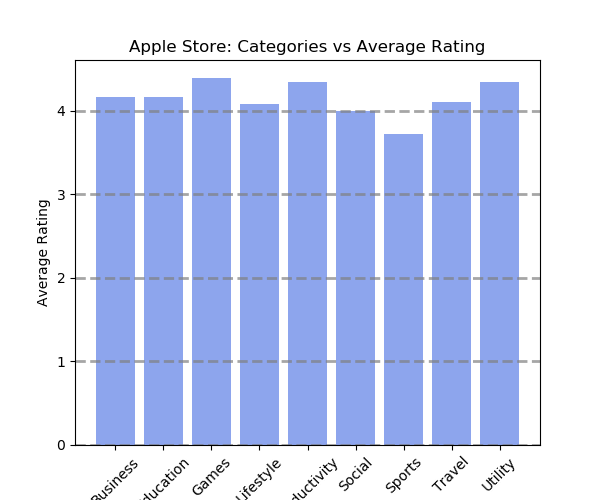

In [32]:
#Charting out the bar graph
plt.figure(2, figsize=(6,5))
#x = ["Business","Education","Games","Lifestyle","Productivity","Social Networking","Sports","Travel","Utlity"]
#y = [4.41, 4.02, 4.30, 4.14, 4.37, 3.70, 3.47, 4.0, 3.91 ]

plt.bar(categories_b, ys, color='royalblue', alpha=.6, align="center")
plt.grid(color='grey', linestyle='--', linewidth=2, axis='y', alpha=.7)
plt.xticks(rotation="45")
plt.title("Apple Store: Categories vs Average Rating")
plt.xlabel("Categories")
plt.ylabel("Average Rating")
plt.show()
plt.savefig("./images/Apple_Bar_Graph.png", bbox_inches='tight')
